In [41]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [42]:
!unzip "/content/drive/MyDrive/Classroom/2018-19 : ML/bank-data.zip"

Archive:  /content/drive/MyDrive/Classroom/2018-19 : ML/bank-data.zip
   creating: bank-data/
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


# Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

# Read & Split Data

In [44]:
data = pd.read_csv("/content/bank-data/bank-full.csv", sep=';')

In [45]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
y = data['y']
X = data.drop("y", axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 7658 to 41918
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 24261 to 40023
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.8+ MB


In [49]:
X_train.shape, X_test.shape

((31647, 16), (13564, 16))

# Data Exploration

In [50]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7658,35,management,single,tertiary,no,644,yes,no,unknown,30,may,120,2,-1,0,unknown
11769,57,unemployed,married,secondary,no,468,yes,no,unknown,20,jun,329,1,-1,0,unknown
8378,32,services,married,secondary,yes,-790,yes,no,unknown,3,jun,159,1,-1,0,unknown
6864,28,technician,single,secondary,no,1536,yes,no,unknown,28,may,347,2,-1,0,unknown
4381,44,services,married,primary,no,1161,yes,no,unknown,19,may,110,5,-1,0,unknown


In [51]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24261,48,technician,married,primary,no,4656,no,no,cellular,17,nov,44,1,-1,0,unknown
18443,51,admin.,divorced,secondary,no,3029,yes,yes,cellular,31,jul,118,2,-1,0,unknown
41327,32,management,married,tertiary,no,937,no,no,cellular,28,aug,90,1,94,2,failure
16801,42,blue-collar,married,secondary,no,0,yes,no,cellular,24,jul,149,2,-1,0,unknown
12498,30,admin.,married,tertiary,no,1717,no,yes,unknown,2,jul,218,2,-1,0,unknown


In [52]:
X_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [53]:
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [54]:
y_train.value_counts()

no     27949
yes     3698
Name: y, dtype: int64

(array([27949.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3698.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

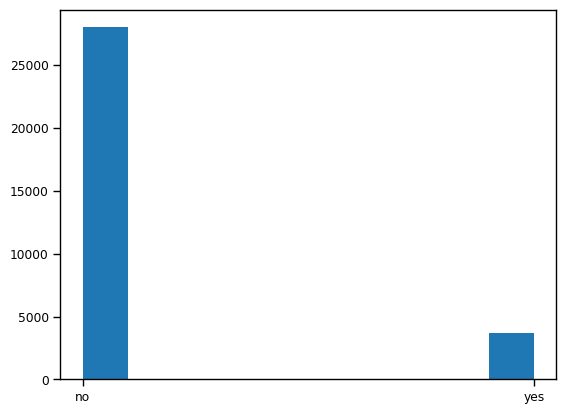

In [55]:
plt.hist(y_train)

In [56]:
y_train.value_counts(normalize=True)

no     0.883148
yes    0.116852
Name: y, dtype: float64

In [57]:
X_train["age"].value_counts()

32    1461
31    1426
33    1385
34    1323
35    1313
      ... 
95       2
87       2
90       2
94       1
93       1
Name: age, Length: 76, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

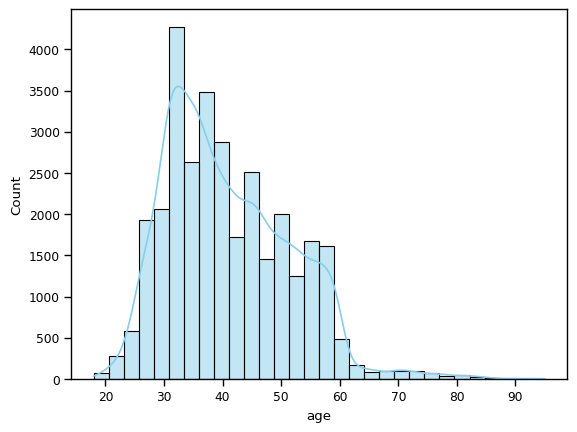

In [58]:
sns.histplot(X_train["age"], bins=30, kde=True, color='skyblue', edgecolor='black')

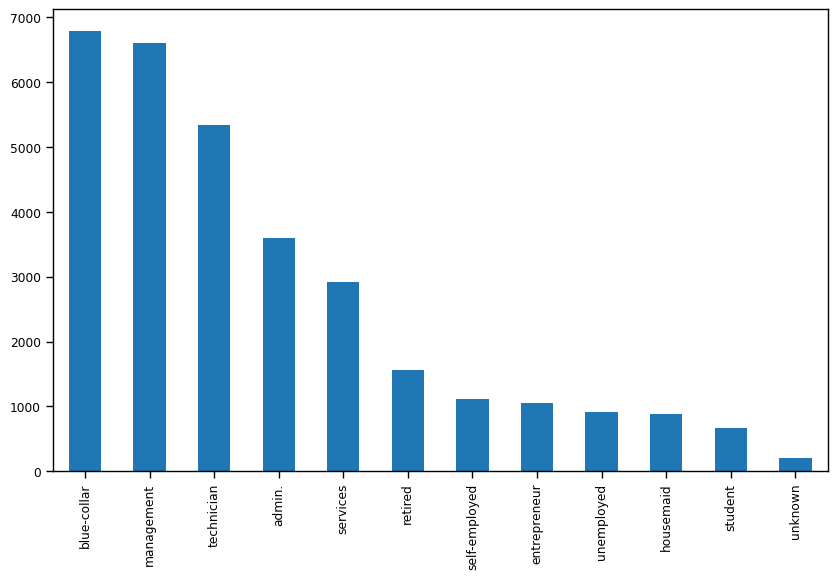

In [59]:
sns.set_context('paper')
X_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [60]:
X_train['job'].value_counts()

blue-collar      6785
management       6608
technician       5340
admin.           3604
services         2924
retired          1567
self-employed    1117
entrepreneur     1048
unemployed        909
housemaid         884
student           662
unknown           199
Name: job, dtype: int64

In [61]:
X_train['marital'].value_counts()

married     19056
single       8943
divorced     3648
Name: marital, dtype: int64

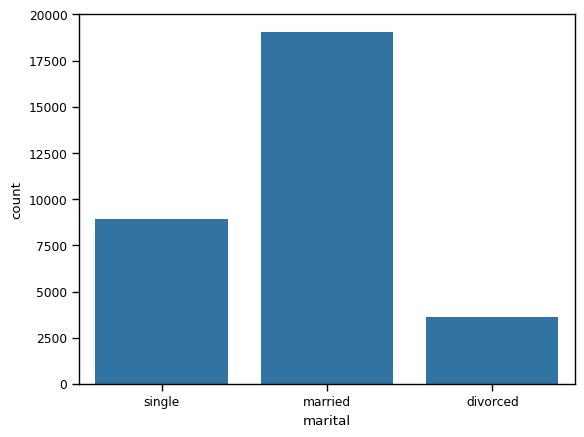

In [62]:
# plt.hist(X_train.marital)
sns.countplot(data=X_train, x='marital');


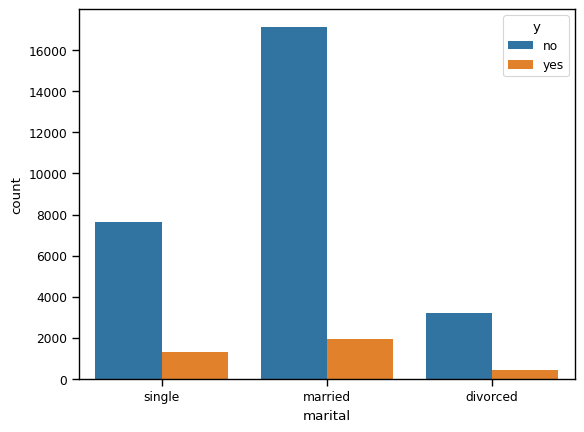

In [63]:
sns.countplot(data=X_train, x='marital', hue=y_train);

In [64]:
pd.crosstab(X_train['job'],y_train)

y,no,yes
job,,
admin.,3160,444
blue-collar,6304,481
entrepreneur,952,96
housemaid,803,81
management,5717,891
retired,1219,348
self-employed,977,140
services,2658,266
student,476,186


In [65]:
job = pd.crosstab(X_train['job'],y_train)
job_norm = job.div(job.sum(1).astype(float), axis=0)

In [66]:
job_norm

y,no,yes
job,,
admin.,0.876804,0.123196
blue-collar,0.929108,0.070892
entrepreneur,0.908397,0.091603
housemaid,0.908371,0.091629
management,0.865163,0.134837
retired,0.777920,0.222080
self-employed,0.874664,0.125336
services,0.909029,0.090971
student,0.719033,0.280967


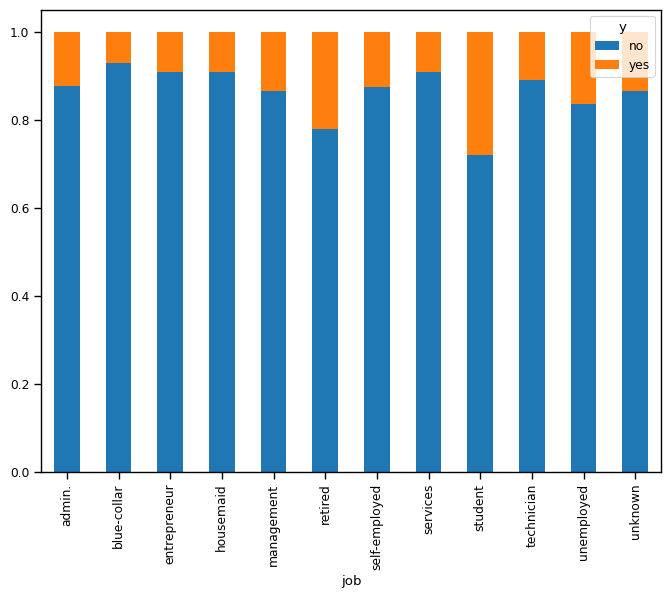

In [67]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

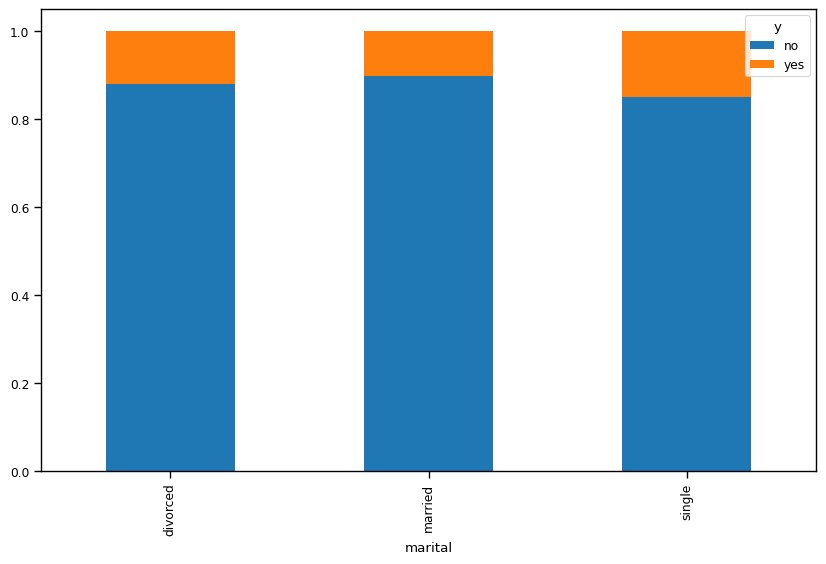

In [68]:
marital = pd.crosstab(X_train['marital'], y_train)
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm.plot.bar(stacked=True, figsize=(10,6));

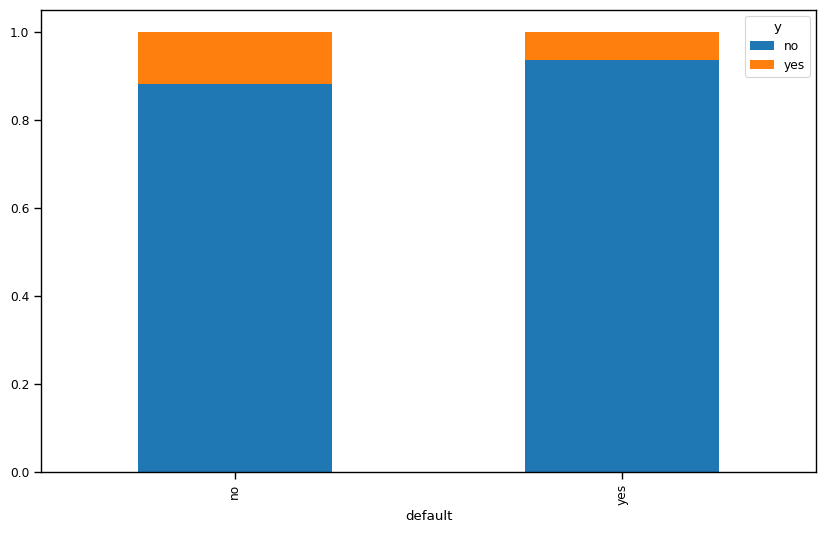

In [69]:
default = pd.crosstab(X_train['default'], y_train)
default_norm = default.div(default.sum(1).astype(float), axis=0)
default_norm.plot.bar(stacked=True, figsize=(10,6));

In [70]:
y_train.replace('no', 0,inplace=True)
y_train.replace('yes', 1,inplace=True)
y_test.replace('no', 0,inplace=True)
y_test.replace('yes', 1,inplace=True)

In [71]:
y_train

7658     0
11769    0
8378     0
6864     0
4381     0
        ..
29693    0
33273    0
3729     0
4663     0
41918    0
Name: y, Length: 31647, dtype: int64

In [72]:
train_correlation = X_train.corr()

<Axes: >

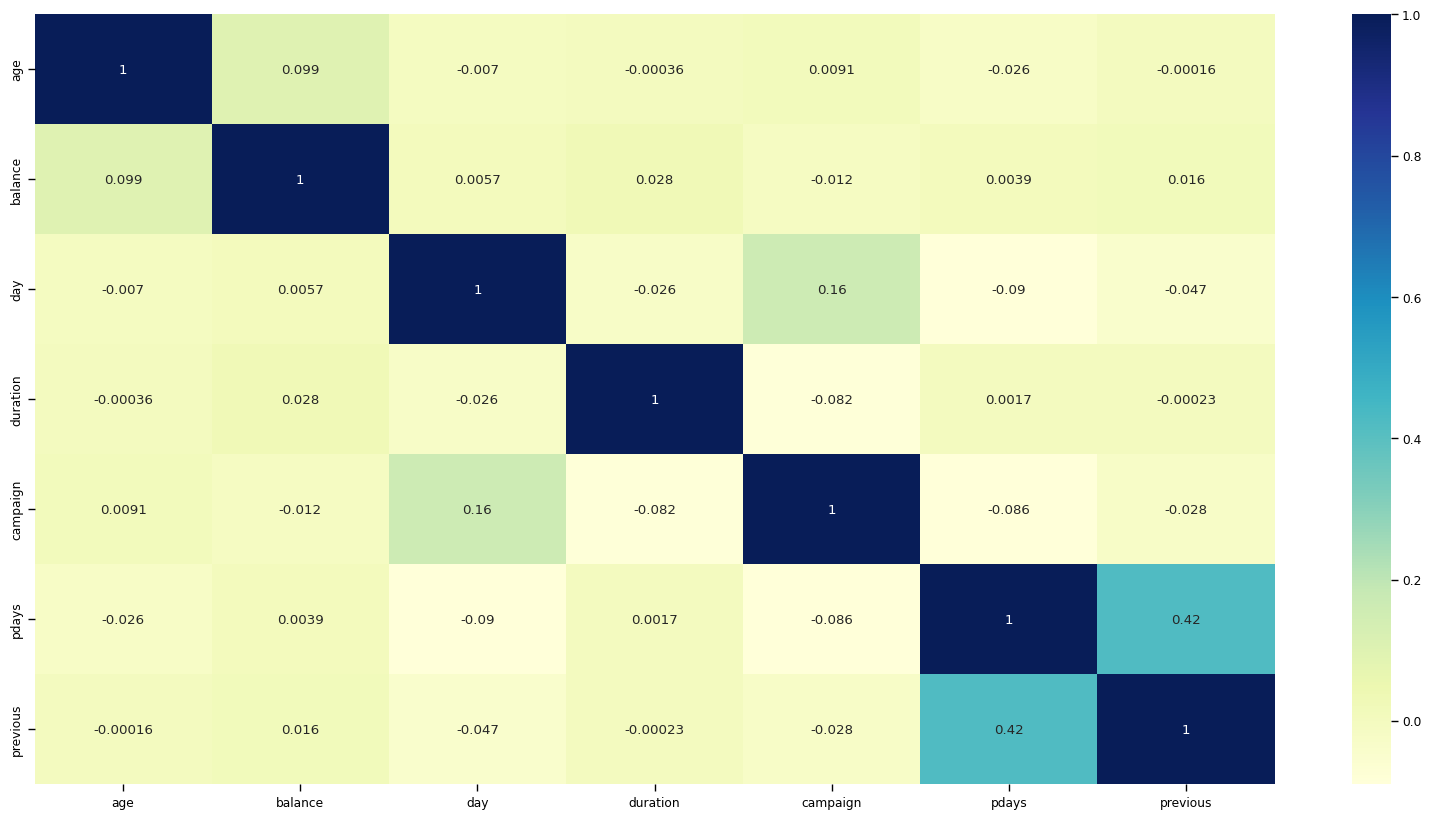

In [73]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_correlation, annot=True, cmap='YlGnBu')

# Model Building

In [74]:
X_train.shape, y_train.shape

((31647, 16), (31647,))

In [75]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [76]:
y_train

7658     0
11769    0
8378     0
6864     0
4381     0
        ..
29693    0
33273    0
3729     0
4663     0
41918    0
Name: y, Length: 31647, dtype: int64

In [77]:
lreg = LogisticRegression()

In [78]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [79]:
pred = lreg.predict(X_test)

In [80]:
accuracy_score(y_test,pred)

0.886685343556473

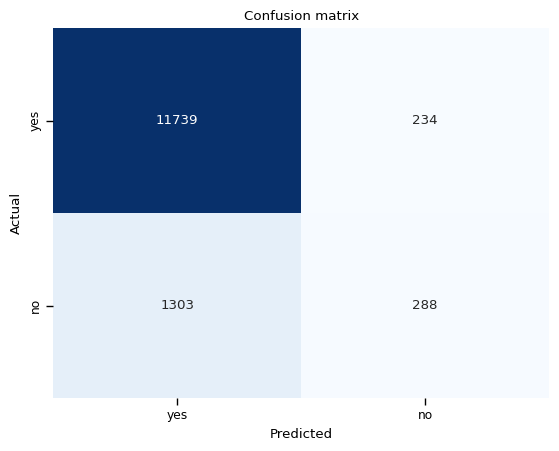

In [81]:
cm=confusion_matrix(y_test,pred)
labels=['yes','no']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
cm

array([[11739,   234],
       [ 1303,   288]])

In [83]:
#Calculating classification metrics
tp,fn,fp,tn=cm.ravel()
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
F1score=(2*precision*recall/(precision+recall))

print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",F1score)
print("Accuracy:",accuracy)

Precision: 90.00920104278485
Recall: 98.0456026058632
F1 score: 93.85568658804719
Accuracy: 88.6685343556473
